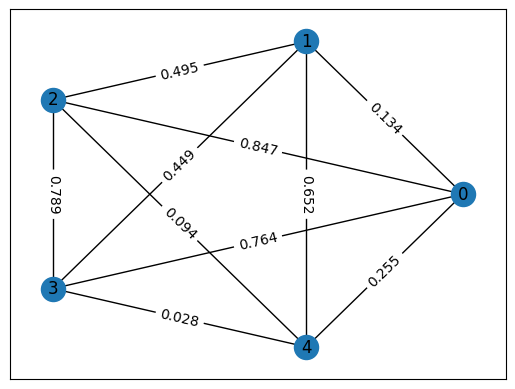

In [1]:
import networkx
import random

def generate_graph(n, seed=1):
    graph = networkx.Graph()
    edge_list = []
    for n1 in range(n):
        for n2 in range(n1+1,n):
            edge_list.append((n1,n2))
    
    graph.add_edges_from(edge_list)
    random.seed(seed)
    weights = [random.random() for i in range(len(edge_list))]

    for index, edge in enumerate(graph.edges()):
        graph.get_edge_data(*edge)['weight'] = weights[index]

    return graph, weights

no_vertices = 5
graph = generate_graph(no_vertices)[0]
pos=networkx.circular_layout(graph)
networkx.draw_networkx(graph, pos)
labels = networkx.get_edge_attributes(graph,'weight')
for edge in labels:
    labels[edge] = round(labels[edge], 3)
tmp = networkx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)


In [2]:
from src_code import build_operators

hamiltonian = build_operators.cut_hamiltonian(graph=graph)
gradient_ops_dict = build_operators.build_all_mixers(graph=graph)
pauli_ops_dict = build_operators.build_all_paulis(no_vertices)

In [3]:
from src_code import useful_methods

max_cut_solution = useful_methods.find_optimal_cut(graph)
max_cut_value = max_cut_solution[1]
max_ham_eigenvalue = max_cut_solution[2]
ham_offset = max_cut_value - max_ham_eigenvalue

hamiltonian = build_operators.cut_hamiltonian(graph)
mix_hamiltonian = build_operators.mix_hamiltonian(graph)

beta = 0
delta_t = 0.1
ham_approx_ratios = []
cut_approx_ratios = []

max_layers = 100
layer = 0

curr_dens_mat = build_operators.initial_density_matrix(no_vertices)

In [4]:
def build_layer(curr_dens_mat,beta):
    """ one layer 
    """
    cut_unit = build_operators.cut_unitary(graph,delta_t,pauli_ops_dict)
    curr_dens_mat = (cut_unit * curr_dens_mat) * (cut_unit.transpose().conj())

    mix_unit = build_operators.mixer_unitary('standard_x', beta * delta_t, pauli_ops_dict, no_vertices)
    curr_dens_mat = (mix_unit * curr_dens_mat) * (mix_unit.transpose().conj())

    return curr_dens_mat

In [5]:
def update_beta(curr_dens_mat):

    A = 1j*(mix_hamiltonian*hamiltonian - hamiltonian * mix_hamiltonian) * curr_dens_mat
    expectation = A.trace().real
    return expectation

In [6]:

while layer < max_layers:
    layer +=1
    curr_dens_mat = build_layer(curr_dens_mat, beta)
    beta = update_beta(curr_dens_mat)

    hamiltonian_expectation = (hamiltonian * curr_dens_mat).trace().real
    ham_approx_ratio = hamiltonian_expectation / max_ham_eigenvalue
    cut_approx_ratio = (hamiltonian_expectation + max_cut_value - max_ham_eigenvalue) / max_cut_value

    print("beta: ", beta, "  layer", layer, ": ", cut_approx_ratio,sep='')

beta: 0.5749578561206035  layer1: 0.6509321521861706
beta: 1.0803704039880428  layer2: 0.6693948803538384
beta: 1.2415644393750456  layer3: 0.7142020768432837
beta: 0.8826269104434508  layer4: 0.7607152976206121
beta: 0.4860682593281007  layer5: 0.7827274002230984
beta: 0.3489441829261353  layer6: 0.7907813230639661
beta: 0.31708371443599204  layer7: 0.7956511788501492
beta: 0.30601966811810577  layer8: 0.7998586106322648
beta: 0.3003733817043326  layer9: 0.8038360875139107
beta: 0.2972722271752124  layer10: 0.8076990410887851
beta: 0.29546684671556794  layer11: 0.8115008331900153
beta: 0.29413579788096966  layer12: 0.8152666980348869
beta: 0.2927556797455775  layer13: 0.8190038891243825
beta: 0.291064596393345  layer14: 0.8227088218773908
beta: 0.28902219503141324  layer15: 0.8263732016625919
beta: 0.286751606728335  layer16: 0.8299890245734161
beta: 0.28446750128107284  layer17: 0.8335520110293313
beta: 0.2824029847662473  layer18: 0.8370632204882275
beta: 0.28074847981281836  layer1